In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from scipy.stats import mode
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from IPython.display import display
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import warnings
warnings.filterwarnings("ignore")


# problem statement
#predict theprice of the car

In [4]:
#data gathering   and validatation
df=pd.read_csv("autos_dataset.csv")

In [5]:
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# eda

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
df.replace({"?":np.nan},inplace=True)

In [11]:
(df.isna().mean()*100).sort_values(ascending=False)

normalized-losses    20.00000
price                 1.95122
stroke                1.95122
bore                  1.95122
peak-rpm              0.97561
num-of-doors          0.97561
horsepower            0.97561
engine-type           0.00000
highway-mpg           0.00000
city-mpg              0.00000
compression-ratio     0.00000
fuel-system           0.00000
engine-size           0.00000
num-of-cylinders      0.00000
symboling             0.00000
height                0.00000
width                 0.00000
length                0.00000
wheel-base            0.00000
engine-location       0.00000
drive-wheels          0.00000
body-style            0.00000
aspiration            0.00000
fuel-type             0.00000
make                  0.00000
curb-weight           0.00000
dtype: float64

In [12]:
    df.describe(
    )

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [14]:
df_obj=df.select_dtypes(include="object")

In [15]:
col=df_obj.columns.to_list()
for col1 in col:
    print("columns\n",col1)
    print(df[col1].value_counts().sort_values(ascending=False))

columns
 normalized-losses
161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
118     4
93      4
148     4
122     4
106     4
101     3
125     3
137     3
154     3
83      3
115     3
145     2
153     2
129     2
113     2
110     2
81      2
188     2
192     2
119     2
158     2
89      2
108     2
197     2
194     2
87      2
164     2
98      1
142     1
90      1
121     1
78      1
77      1
231     1
186     1
107     1
256     1
Name: normalized-losses, dtype: int64
columns
 make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault    

# outliers1

<AxesSubplot:xlabel='city-mpg'>

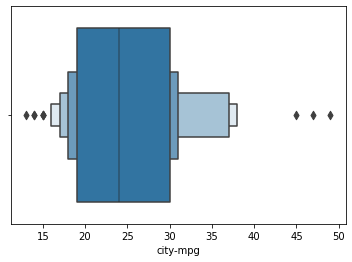

In [16]:
sns.boxenplot(df["city-mpg"])

In [17]:
df.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000


In [18]:
df["price"].isna().sum()

4

# encoding1

# target1

# feature engginerring

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [20]:
df["normalized-losses"].median()

115.0

In [21]:
df["bore"].median()

3.31

In [22]:
df["bore"].fillna(df["bore"].median())

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
5      3.19
6      3.19
7      3.19
8      3.13
9      3.13
10      3.5
11      3.5
12     3.31
13     3.31
14     3.31
15     3.62
16     3.62
17     3.62
18     2.91
19     3.03
20     3.03
21     2.97
22     2.97
23     3.03
24     2.97
25     2.97
26     2.97
27     3.03
28     3.34
29      3.6
30     2.91
31     2.91
32     2.91
33     2.91
34     2.91
35     2.91
36     2.92
37     3.15
38     3.15
39     3.15
40     3.15
41     3.15
42     3.15
43     3.31
44     3.03
45     3.03
46     3.43
47     3.63
48     3.63
49     3.54
50     3.03
51     3.03
52     3.03
53     3.03
54     3.08
55     3.31
56     3.31
57     3.31
58     3.31
59     3.39
60     3.39
61     3.39
62     3.39
63     3.39
64     3.39
65     3.76
66     3.43
67     3.58
68     3.58
69     3.58
70     3.58
71     3.46
72     3.46
73      3.8
74      3.8
75     3.78
76     2.97
77     2.97
78     2.97
79     3.03
80     3.17
81     3.35
82     3.58
83  

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [24]:
df.head(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,NaN


In [99]:
df["normalized-losses"].fillna(df["normalized-losses"].median()).inplace=True

In [26]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [104]:
data1=df.copy()

In [115]:
data1["normalized-losses"]=data1["normalized-losses"].fillna(data1["normalized-losses"].median()).astype(int)
data1["bore"]=data["bore"].fillna(data1["bore"].median()).astype(float)
data1["num-of-doors"]=data1["num-of-doors"].fillna(data1["num-of-doors"].mode()[0])
data1["stroke"]=data1["stroke"].fillna("4").astype(float)
data1["horsepower"]=data1["horsepower"].fillna(data1["horsepower"].median()).astype(int)
data1["peak-rpm"]=data1["peak-rpm"].fillna(data1["peak-rpm"].median()).astype(int)


In [116]:
data1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [117]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int32  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [118]:
data1.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                1
dtype: int64

In [119]:
data1[data1["price"].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
129,1,115,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


In [120]:
lst=[(data1["make"]=="audi")&(data1["price"].isna()),
     (data1["make"]=="isuzu")&(data1["price"].isna()),
     (data1["make"]=="porche")&(data1["price"].isna())]

cond=[(data1[data1["make"]=="audi"]["price"].sort_values(ascending=False).reset_index().drop("index",axis=1).iloc[0][0]),
      (data1[data1["make"]=="isuzu"]["price"].sort_values(ascending=False).reset_index().drop("index",axis=1).iloc[0][0]),
      (data1[data1["make"]=="porsche"]["price"].sort_values(ascending=False).reset_index().drop("index",axis=1).iloc[0][0]),]
data1["price"] = np.select(lst,cond,default =data1["price"])                                                                                                          

In [121]:
(data1[data1["make"]=="porsche"]["price"].sort_values(ascending=False).reset_index().drop("index",axis=1).iloc[0][0])

'37028'

In [37]:
[(data[data["make"]=="audi"]["price"].sort_values(ascending=False).reset_index().drop("index",axis=1).iloc[0][0])]

['23875']

In [124]:
data1.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                1
dtype: int64

In [125]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int32  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# replace1

In [40]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [41]:
data["fuel-type"].unique()

array(['gas', 'diesel'], dtype=object)

In [42]:
data["fuel-type"].replace({"gas":0,"diesel":1},inplace=True)

In [43]:
data["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [44]:
data["aspiration"].replace({"std":0,"turbo":1},inplace=True)

In [45]:
data["num-of-doors"].unique()

array(['two', 'four'], dtype=object)

In [46]:
data["num-of-doors"].replace({"two":0,"four":1},inplace=True)

In [50]:
data = pd.get_dummies(data,columns=["drive-wheels","engine-location"])
data.shape

(205, 46)

In [51]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear
0,3,115,alfa-romero,0,0,0,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,3,115,alfa-romero,0,0,0,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2,1,115,alfa-romero,0,0,0,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
3,2,164,audi,0,0,1,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,2,164,audi,0,0,1,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [53]:
data1 = pd.get_dummies(data,columns=["make","num-of-cylinders"])
data.shape

(205, 73)

In [62]:
data["price"] = data["price"].astype(int)
data["price"].dtype

dtype('int32')

In [63]:
data.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two
0,3,115,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3,115,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,115,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2,164,0,0,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2,164,0,0,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [64]:
data=pd.get_dummies(data,columns=[""])

KeyError: "None of [Index([''], dtype='object')] are in the [columns]"

In [65]:
data=pd.get_dummies(data,columns[])

SyntaxError: invalid syntax (3992020712.py, line 1)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 73 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   normalized-losses        205 non-null    int32  
 2   fuel-type                205 non-null    int64  
 3   aspiration               205 non-null    int64  
 4   num-of-doors             205 non-null    int64  
 5   wheel-base               205 non-null    float64
 6   length                   205 non-null    float64
 7   width                    205 non-null    float64
 8   height                   205 non-null    float64
 9   curb-weight              205 non-null    int64  
 10  engine-size              205 non-null    int64  
 11  bore                     205 non-null    float64
 12  stroke                   205 non-null    float64
 13  compression-ratio        205 non-null    float64
 14  horsepower               2

# feature selection1

In [67]:
data.corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two
symboling,1.000000,0.457484,-0.194311,-0.059866,-0.663595,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.132563,0.068655,-0.178515,0.071064,0.273851,-0.035823,0.034606,-0.080149,0.279440,0.168845,0.435648,-0.378341,-0.298243,0.116925,0.009347,-0.133979,-0.082855,0.037513,-0.013597,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707,-0.067222,0.102839,-0.076381,-0.212471,0.212471,0.147071,0.068348,-0.074482,0.016270,0.028609,-0.045822,-0.009555,-0.081830,0.068625,-0.135313,0.009347,0.211978,0.041422,-0.159891,0.025103,0.224755,0.013252,0.232847,-0.067071,-0.094046,0.167106,-0.403849,-0.004346,-0.090188,-0.034161,-0.000238,0.065707,-0.047012,0.245950
normalized-losses,0.457484,1.000000,-0.104668,-0.011273,-0.348850,-0.073709,-0.006837,0.058378,-0.365674,0.064343,0.072536,-0.050428,0.083378,-0.114772,0.166964,0.241134,-0.189530,-0.149357,0.089310,0.011311,0.034298,0.205236,-0.025142,-0.285199,0.151813,-0.012358,0.170806,-0.156069,-0.210771,0.130717,0.130721,-0.122539,-0.123927,0.112927,-0.104668,0.053844,0.179458,0.052231,-0.012358,-0.133128,-0.212838,0.273564,0.021510,-0.021510,-0.021510,0.122589,0.202613,-0.079126,0.086751,-0.144344,-0.024899,0.016901,0.021632,-0.083999,-0.012358,0.150905,0.142443,0.177668,0.037928,0.042858,-0.017519,0.035026,-0.222808,-0.137758,-0.011265,-0.218742,-0.000997,-0.009961,-0.188104,0.197788,0.000883,-0.012358,0.130721
fuel-type,-0.194311,-0.104668,1.000000,0.401397,0.188496,0.308346,0.212679,0.233880,0.284631,0.217275,0.069594,0.054923,0.215189,0.984356,-0.164393,-0.477507,0.255963,0.191392,0.102733,-0.057092,0.018635,-0.202093,0.185623,0.028183,-0.081986,-0.023020,0.268163,0.020584,-0.092384,-0.085556,-0.046383,-0.078293,-0.226565,-0.040070,1.000000,-0.023020,-0.302574,-0.070457,-0.023020,-0.070457,-0.090342,0.122035,0.040070,-0.040070,-0.040070,-0.061822,-0.066258,-0.040070,-0.070457,-0.085556,-0.046383,-0.040070,0.020356,0.273316,-0.023020,-0.085556,-0.043921,0.286482,-0.061822,-0.051988,-0.032636,-0.057092,-0.081986,-0.005524,0.198133,-0.005338,-0.051988,0.213527,-0.020184,-0.068594,-0.023020,-0.023020,-0.046383
aspiration,-0.059866,-0.011273,0.401397,1.000000,0.052803,0.257611,0.234539,0.300567,0.087311,0.324902,0.108217,0.213281,0.191086,0.295541,0.241193,-0.184326,-0.202362,-0.254416,0.182781,-0.081488,-0.029074,0.009786,0.017111,0.018908,-0.008961,-0.032857,0.207156,-0.020162,-0.034450,-0.070070,-0.066203,-0.111748,-0.323378,-0.057191,0.401397,0.149190,-0.050041,0.394703,-0.032857,0.085162,-0.145681,0.112470,0.057191,-0.057191,-0.057191,0.051445,-0.094571,-0.057191,0.085162,-0.122115,-0.066203,-0.057191,-0.141121,0.167416,0.149190,0.190153,-0.100783,0.225968,0.051445,-0.074202,-0.046581,0.069008,-0.008961,-0.166890,-0.008961,0.169682,-0.074202,0.225968,0.009195,-0.091987,-0.032857,-0.032857,-0.066203
num-of-doors,-0.663595,-0.348850,0.188496,0.052803,1.000000,0.439635,0.385675,0.197735,0.540

In [88]:
data.corr().loc["price"].sort_values(ascending=False)

price                      1.000000
engine-size                0.870751
curb-weight                0.835657
horsepower                 0.819737
width                      0.764977
length                     0.678818
drive-wheels_rwd           0.633609
wheel-base                 0.571784
bore                       0.553281
fuel-system_mpfi           0.519828
make_mercedes-benz         0.506973
num-of-cylinders_eight     0.493216
num-of-cylinders_six       0.466695
engine-type_ohcv           0.379420
make_porsche               0.375851
make_jaguar                0.320959
engine-location_rear       0.319873
make_bmw                   0.319279
num-of-cylinders_five      0.261157
body-style_hardtop         0.221789
engine-type_dohcv          0.205427
num-of-cylinders_twelve    0.196522
body-style_convertible     0.184276
aspiration                 0.182781
engine-type_dohc           0.148195
make_volvo                 0.139951
make_audi                  0.125755
body-style_sedan           0

# model training


In [89]:
x=data.drop("price",axis=1)
y=data["price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [90]:
lr_model=LinearRegression()
lr_model.fit(x_tain,y_tarin)

LinearRegression()

# modelevaulation


## training1

In [92]:
y_pred=lr_mod.predict(x_tain)
mse=mean_squared_error(y_tarin,y_pred)
print("mse",mse)
mae=mean_absolute_error(y_tarin,y_pred)
print("mae",mae)
r2=r2_score(y_train,y_pred)
print("r2",r2)

mse 42893120.99399349
mae 4718.261412197732
r2 -0.5737364300326242


# testing1

In [93]:
y_pred=lr_mod.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("mse",mse)
mae=mean_absolute_error(y_test,y_pred)
print("mae",mae)
r2=r2_score(y_test,y_pred)
print("r2",r2)

mse 145260333.67413208
mae 8418.250558472999
r2 -0.7782714595899347


# user input

In [94]:
x.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'fuel-system_1bbl', 'fuel-system_2bbl', 'fuel-system_4bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
       'fuel-system_spdi', 'fuel-system_spfi', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_front',
       'engine-location_rear', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'm

In [95]:
data.iloc[0]

symboling                      3.00
normalized-losses            115.00
fuel-type                      0.00
aspiration                     0.00
num-of-doors                   0.00
wheel-base                    88.60
length                       168.80
width                         64.10
height                        48.80
curb-weight                 2548.00
engine-size                  130.00
bore                           3.47
stroke                         2.68
compression-ratio              9.00
horsepower                   111.00
peak-rpm                    5000.00
city-mpg                      21.00
highway-mpg                   27.00
price                      13495.00
body-style_convertible         1.00
body-style_hardtop             0.00
body-style_hatchback           0.00
body-style_sedan               0.00
body-style_wagon               0.00
engine-type_dohc               1.00
engine-type_dohcv              0.00
engine-type_l                  0.00
engine-type_ohc             

In [100]:
df.iloc[0]

symboling                      3
normalized-losses            NaN
make                 alfa-romero
fuel-type                    gas
aspiration                   std
num-of-doors                 two
body-style           convertible
drive-wheels                 rwd
engine-location            front
wheel-base                  88.6
length                     168.8
width                       64.1
height                      48.8
curb-weight                 2548
engine-type                 dohc
num-of-cylinders            four
engine-size                  130
fuel-system                 mpfi
bore                        3.47
stroke                      2.68
compression-ratio            9.0
horsepower                   111
peak-rpm                    5000
city-mpg                      21
highway-mpg                   27
price                      13495
Name: 0, dtype: object

In [126]:
data1.iloc[0]

symboling                      3
normalized-losses            115
make                 alfa-romero
fuel-type                    gas
aspiration                   std
num-of-doors                 two
body-style           convertible
drive-wheels                 rwd
engine-location            front
wheel-base                  88.6
length                     168.8
width                       64.1
height                      48.8
curb-weight                 2548
engine-type                 dohc
num-of-cylinders            four
engine-size                  130
fuel-system                 mpfi
bore                        3.47
stroke                      2.68
compression-ratio            9.0
horsepower                   111
peak-rpm                    5000
city-mpg                      21
highway-mpg                   27
price                      13495
Name: 0, dtype: object

In [ ]:
# symboling                       3
# normalized-losses             115
# make                  alfa-romero
# fuel-type                    gas
#aspiration                   std
#num-of-doors                 two
#body-style             convertible
#drive-wheels                 rwd
#engine-location            front
#wheel-base                  88.6
#length                     168.8
#width                       64.1
#height                      48.8
#curb-weight                 2548
#engine-type                 dohc
#num-of-cylinders            four
#engine-size                  130
#fuel-system                 mpfi
#bore                        3.47
#stroke                      2.68
#compression-ratio            9.0
#horsepower                   111
#peak-rpm                    5000
#city-mpg                      21
#highway-mpg                   27